# Music Lyrics Through the Years

#### Import (possibly) necessary libraries

In [20]:
import pandas as pd; pd.options.display.max_rows = 200
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

import re
from unicodedata import normalize

import requests as rq
from bs4 import BeautifulSoup as bs
from selenium import webdriver

import pickle
import gzip

from functions.webscraping import *

import json

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scrape song title and artist

In [2]:
%%time

# list of unique songs in top 10 between 1960 and 2019
all_top10s = [
    yearly_top10s(f'https://top40weekly.com/{year}-all-charts/') for year in range(1960,2020)
]

len(all_top10s)

CPU times: user 14.3 s, sys: 172 ms, total: 14.4 s
Wall time: 1min 32s


60

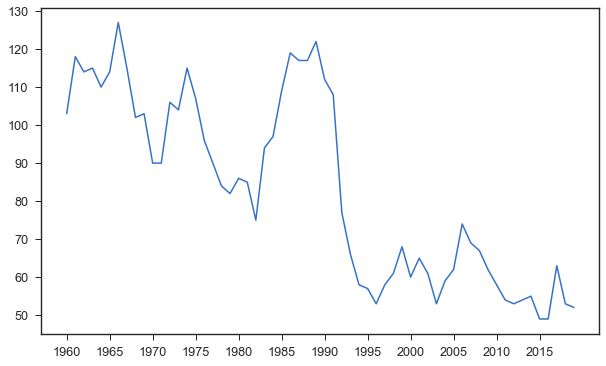

In [3]:
# graph number of unique songs per year
plt.figure(figsize=(10,6))
plt.plot([len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

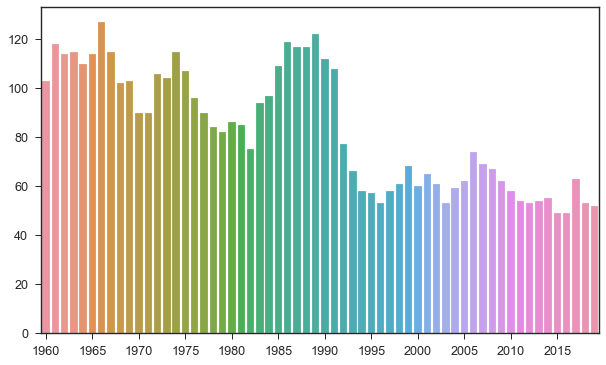

In [4]:
# graph number of unique songs per year
plt.figure(figsize=(10,6))
sns.barplot(x=[year for year in range(1960,2020)], y=[len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

In [5]:
# number of songs
sum([len(year) for year in all_top10s])

4996

- Since some songs may be within the top 10 in two different years, I need to remove those from the list.

In [6]:

temp_dict = {}

for i,year in enumerate(all_top10s):
    for song in year:
        if song in temp_dict:
            print(song)
            all_top10s[i].remove(song)
            
        else:
            temp_dict[song] = 1
            
len(temp_dict)

('SAILOR (Your Home Is the Sea)', 'Lolita')
('YOU’RE SIXTEEN', 'Johnny Burnette')
('MANY TEARS AGO', 'Connie Francis')
('NORTH TO ALASKA', 'Johnny Horton')
('THE TWIST', 'Chubby Checker')
('WONDERLAND BY NIGHT', 'Bert Kaempfert')
('A THOUSAND STARS', 'Kathy Young and the Innocents')
('LAST DATE', 'Floyd Cramer')
('EXODUS', 'Ferrante and Teicher')
('GOODBYE CRUEL WORLD', 'James Darren')
('RUN TO HIM', 'Bobby Vee')
('WALK ON BY', 'Leroy Van Dyke')
('THE TWIST', 'Chubby Checker')
('HAPPY BIRTHDAY, SWEET SIXTEEN', 'Neil Sedaka')
('PEPPERMINT TWIST (Part 1)', 'Joey Dee and the Starliters')
('THE LION SLEEPS TONIGHT', 'The Tokens')
('HOTEL HAPPINESS', 'Brook Benton')
('ZIP-A-DEE DOO-DAH', 'Bob B')
('LIMBO ROCK', 'Chubby Checker')
('GO AWAY LITTLE GIRL', 'Steve Lawrence')
('BOBBY’S GIRL', 'Marcie Blane')
('TALK BACK TREMBLING LIPS', 'Johnny Tillotson')
('DOMINIQUE', 'The Singing Nun')
('POPSICLES AND ICICLES', 'The Murmaids')
('SINCE I FELL FOR YOU', 'Lenny Welch')
('FORGET HIM', 'Bobby Rydel

4118

In [7]:
# number of unique songs
sum([len(year) for year in all_top10s])

4555

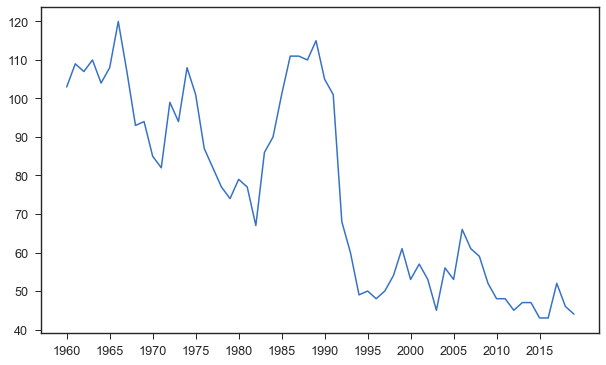

In [8]:
plt.figure(figsize=(10,6))
plt.plot([len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

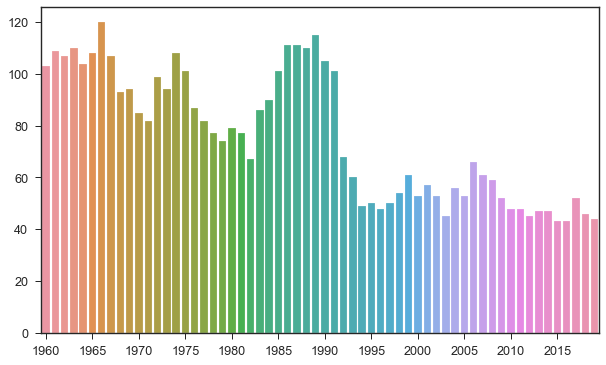

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=[year for year in range(1960,2020)], y=[len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

## Scrape lyrics

In [10]:
# parse personal api keys
with open('data/api_keys.json', 'r') as json_file:
    creds = json.load(json_file)

# set the credentials based on the credentials file
client_id = creds['client_id']
client_secret = creds['client_secret']
access_token = creds['access_token']

In [11]:
%%time

top10s = []

for i,year in enumerate(all_top10s):
    
    print('\n' + str(i+1960))
    
    for song in year:
        
        song_dict = {}
        song_dict['year'] = i+1960
        song_dict['title'] = song[0]
        song_dict['artist'] = song[1]
        search_term = f'{song[0]} {song[1]}'
        
        try:
            song_dict['lyrics'] = lyrics_grabber(access_token, search_term)
            
        except:
            try:
                search_term = f"{re.match('[A-Z ]+', song[0]).group()} {' '.join(song[1].split()[:2])}"
                song_dict['lyrics'] = lyrics_grabber(access_token, search_term)
                                                                                 
            except:
                print(f'  {search_term}')
                song_dict['lyrics'] = np.nan
                                                                                 
        top10s.append(song_dict)
        
len(top10s)


1960

1961

1962

1963
  (Down At) PAPA JOE’S The Dixiebelles

1964

1965

1966

1967
  AN OPEN LETTER TO MY TEENAGE SON Victor Lundberg

1968

1969

1970
  MIDNIGHT COWBOY Ferrante and

1971

1972
  JUNGLE FEVER The Chakachas

1973

1974

1975

1976

1977

1978

1979

1980

1981

1982

1983

1984

1985

1986

1987

1988

1989

1990

1991

1992

1993

1994

1995

1996

1997

1998

1999

2000

2001

2002

2003

2004

2005

2006

2007

2008

2009

2010

2011

2012

2013

2014

2015

2016
  JUJU ON DAT BEAT  Zayion McCall

2017

2018

2019
CPU times: user 5min 33s, sys: 14.6 s, total: 5min 47s
Wall time: 1h 55min 43s


4555

In [12]:
df = pd.DataFrame(top10s)
df.shape

(4555, 4)

In [13]:
df.head()

,year,title,artist,lyrics
0,1960,PAPER ROSES,Anita Bryant,I realize the way your eyes deceived me\nWith ...
1,1960,HE’LL HAVE TO GO,Jim Reeves,[Verse 1]\nPut your sweet lips a little closer...
2,1960,O DIO MIO,Annette,"[Strofa 1]\nE un giorno lui mi disse: ""Nei tuo..."
3,1960,YOGI,The Ivy Three,[Chorus]\nI got bitches on the side but she st...
4,1960,KIDDIO,Brook Benton,"I told you, baby, how I feel\nOne word can clo..."


In [14]:
df.tail()

,year,title,artist,lyrics
4550,2019,TALK,Khalid,[Chorus]\nCan we just talk? Can we just talk?\...
4551,2019,MIDDLE CHILD,J,"[Intro]\nYou good, T-Minus?\n\n[Refrain]\nNigg..."
4552,2019,I DON’T CARE,Ed Sheeran,[Verse 1: Ed Sheeran]\nI'm at a party I don't ...
4553,2019,TRUTH HURTS,Lizzo,[Intro]\nWhy men great 'til they gotta be grea...
4554,2019,PANINI,Lil Nas X,[Intro: Nessly]\nD-D-Daytrip took it to ten (H...


In [81]:
# uncomment to save
with gzip.open('data/lyrics_df.pkl', 'wb') as goodbye:
    pickle.dump(df, goodbye, protocol=pickle.HIGHEST_PROTOCOL)
    
# # uncomment to load
# with gzip.open('data/lyrics_df.pkl', 'rb') as hello:
#     df = pickle.load(hello)

## Rescrapes

#### 1960

In [39]:
url = 'https://www.lyricsmode.com/lyrics/t/the_ivy_three/yogi.html'
page = rq.get(url)
soup = bs(page.content, 'html.parser')
df.loc[3, 'lyrics'] = '\n'.join(
    [line.strip() for line in soup.find('div', attrs={'id': 'lyrics_text'}).contents
     if isinstance(line, str) if line.strip()]
)
df.head()

,year,title,artist,lyrics
0,1960,PAPER ROSES,Anita Bryant,I realize the way your eyes deceived me\nWith ...
1,1960,HE’LL HAVE TO GO,Jim Reeves,[Verse 1]\nPut your sweet lips a little closer...
2,1960,O DIO MIO,Annette,"[Strofa 1]\nE un giorno lui mi disse: ""Nei tuo..."
3,1960,YOGI,The Ivy Three,"I saw a kook, who was standing on his head\nHe..."
4,1960,KIDDIO,Brook Benton,"I told you, baby, how I feel\nOne word can clo..."


In [42]:
df.loc[51, 'lyrics'] = lyrics_grabber(access_token, search_term="because they're young duane eddy and the rebels")

In [55]:
url = 'https://www.stlyrics.com/lyrics/heartsinatlantis/themefromasummerplace.htm'
page = rq.get(url)
soup = bs(page.content, 'html.parser')
df.loc[57, 'lyrics'] = '\n'.join(
    [line.contents[0] for line in soup.find_all('div', class_='highlight') if line.contents]
)
df.loc[57, 'lyrics']

"There's a summer place\nWhere it may rain or storm\nYet I'm safe and warm\nFor within that summer place\nYour arms reach out to me\nAnd my heart is free from all care\nFor it knows\nThere are no gloomy skies\nWhen seen through the eyes\nOf those who are blessed with love\nAnd the sweet secret of\nA summer place\nIs that it's anywhere\nWhen two people share\nAll their hopes\nAll their dreams\nAll their love\nThere's a summer place\nWhere it may rain or storm\nYet I'm safe and warm\nIn your arms, in your arms\nIn your arms, in your arms\nIn your arms, in your arms"

In [80]:
url = 'https://mojim.com/usy155738x2x2.htm'
page = rq.get(url)
soup = bs(page.content, 'html.parser')

df.loc[101, 'lyrics'] = '\n'.join(
    [line for line in soup.find('dl', attrs={'id': 'fsZx1'}).contents[6:]
     if isinstance(line, str) if line.strip()]
)

df.loc[101, 'lyrics']

"This land is mine, God gave this land to me\nThis brave and ancient land to me\nAnd when the morning sun reveals her hills and plain\nThen I see a land where children can run free\nSo take my hand and walk this land with me\nAnd walk this lovely land with me\nThough I am just a man, when you are by my side\nWith the help of God, I know I can be strong\nThough I am just a man, when you are by my side\nWith the help of God, I know I can be strong\nTo make this land our home\nIf I must fight, I'll fight to make this land our own\nUntil I die, this land is mine"

#### 1961

In [83]:
df[df.year == 1961]

,year,title,artist,lyrics
103,1961,CRAZY,Patsy Cline,"[Verse 1]\nCrazy, I'm crazy for feeling so lon..."
104,1961,RUNNING SCARED,Roy Orbison,Just runnin' scared each place we go\nSo afrai...
105,1961,PORTRAIT OF MY LOVE,Steve Lawrence,There could never be a portrait of my love\nFo...
106,1961,I FEEL SO BAD,Elvis Presley,[Verse 1]\nFeel so bad\nLike a ball game on a ...
107,1961,ANGEL BABY,Rosie and The Originals,"That's right, ha ha, this is for the oldies\nA..."
108,1961,RUNAWAY,Del Shannon,As I walk along\nI wonder what went wrong\nWit...
109,1961,I UNDERSTAND (Just How You Feel),The G,[Verse 1]\nGrinning down through the gates\nWa...
110,1961,MY TRUE STORY,The Jive Five,"Cry, cry, cry whoa, uh, oh, oh, oh, oh\nCry, c..."
111,1961,GOODBYE CRUEL WORLD,James Darren,"[Intro]\n(Goodbye, cruel world)\n(Goodbye, cru..."
112,1961,TOWER OF STRENGTH,Gene McDaniels,"[Verse 1]\nIf I were a tower of strength, I'd ..."


In [85]:
df.loc[113, 'lyrics'] = np.nan

In [103]:
url = 'https://www.flashlyrics.com/lyrics/ferrante-and-teicher/tonight-12'
page = rq.get(url)
soup = bs(page.content, 'html.parser')
df.loc[123, 'lyrics'] = '\n'.join(
    [line.contents[0] for line in soup.find('div', attrs={'class': 'main-panel-content'}).find_all('span')
     if line.contents]
)

In [98]:
soup.find('div', attrs={'class': 'main-panel-content'}).find_all('span')

[<span>Tonight, tonight, won't be just any night</span>,
 <span>Tonight there will be no morning star</span>,
 <span></span>,
 <span>Tonight, tonight, I'll see my love tonight</span>,
 <span>And for us, stars will stop where they are</span>,
 <span>Today, the minutes seem like hours</span>,
 <span>The hours go so slowly</span>,
 <span>And still the sky is light</span>,
 <span>Oh moon, grow bright and make this endless day</span>,
 <span>Endless night, tonight</span>,
 <span></span>,
 <span>Today, the world was just an adress</span>,
 <span>A place for me to live in</span>,
 <span>No better than all right.</span>,
 <span></span>,
 <span>But here you are, and what was just a world</span>,
 <span>Is a star, tonight</span>]

In [105]:
df.loc[124, 'lyrics']

'[Intro]\n(Big John)\n(Big John)\n\n[Verse 1]\nEv\'ry mornin\' at the mine you could see him arrive\nHe stood six foot six and weighed two forty five\nKinda broad at the shoulder and narrow at the hip\nAnd everybody knew, ya didn\'t give no lip to Big John\n\n[Chorus]\n(Big John, Big John)\nBig Bad John\n(Big John)\n\n[Verse 2]\nNobody seemed to know where John called home\nHe just drifted into town and stayed all alone\nHe didn\'t say much, he kinda quiet and shy\nAnd if you spoke at all, he just said, "Hi" to Big John\n\n[Verse 3]\nSomebody said he came from New Orleans\nWhere he got in a fight over a Cajun Queen\nAnd a crashin\' blow from a huge right hand\nSent a Louisiana fellow to the Promised Land, Big John\n\n[Chorus]\n(Big John, Big John)\nBig Bad John\n(Big John)\n\n[Verse 4]\nThen came the day at the bottom of the mine\nWhen a timber cracked and men started cryin\'\nMiners were prayin\' and hearts beat fast\nAnd everybody thought that they\'d breathed their last, \'cept John

In [ ]:
please break this code

In [ ]:
search_term = f'{all_top10s[0][0][0]} {all_top10s[0][0][1]}'

In [ ]:
def lyrics_grabber(access_token, search_term, base_url='https://genius.com'):
    genius = lyricsgenius.Genius(access_token)
    song = genius.search(search_term)
    url_addon = song['hits'][0]['result']['path']
    lyrics = genius.lyrics(base_url + url_addon)
    return lyrics

In [ ]:
%%time
lyrics_grabber(access_token, 'North to Alaska Johnny Horton')

In [ ]:
1.24 * 4600 / 60

In [ ]:
test = 'PERCOLATOR (Twist) Billy Joe and the Checkmates'

In [ ]:
search_term = re.match('[A-Z ]+', test).group() + ' '.join('Billy Joe and the Checkmates'.split()[:2])
search_term